<a href="https://colab.research.google.com/github/SEESchwaene/leveraged_ETF/blob/main/leveraged_ETF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Thesis: Despite the inherent drawbacks of leveraged ETFs, they can prove to be sound long-term investments.

Keywords: leveraged ETF, volatility drag, risks, quantitative finance


Data from 1927 to 2020 from yfinance spx data (1927 to 2023).

Link: https://finance.yahoo.com/quote/%5EGSPC/history?p=%5EGSPC


# Question:
What are the risks associated with a leveraged ETF position? Our primary emphasis will be directed towards the examination of the concept of volatility drag. This choice is motivated by the inherent difficulties in quantifying Risk 1 (Total Expense Ratio or TER) and Risk 2 (Issuer Risk).

TER tends to exhibit a consistent downward trajectory over time, rendering it challenging to provide concrete quantitative assessments. Likewise, Issuer Risk remains challenging to quantify due to the fact that each issuer employs a distinct model for risk evaluation. Therefore, these two risks necessitate individualized consideration when assessing an investment.

Consequently, we will begin by briefly addressing these two risks before delving into more detailed analysis.

# Setup:
To replicate these findings, it is essential to have access to the dataset. In the context of this report, the dataset file is located in the /content/drive directory. If you opt to download the dataset, please ensure that you place it in your preferred directory to facilitate the seamless execution of the script.



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Installs
!pip install matplotlib
!pip install numpy
!pip install pandas
!pip install seaborn

In [ ]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
import numpy as np
import seaborn as sns

# Risk 1: Total Expense Ratio (TER)
The Total Expense Ratio (TER) associated with the current leveraged Exchange Traded Fund (ETF) linked to the S&P 500 stands at a range between 0.63% and 1%. For the sake of simplicity, we will adopt a TER of 1% for calculation purposes. It is noteworthy that ETF fees are assessed on a daily basis, allowing us to compute the daily expense as follows: 252 (representing the number of trading days in a year) divided by 1% (equivalent to 0.01) equals 0.0039683%, which translates to a daily expense of 0.039683 or 4 cents for a 1000$ investment.

# Risk 2: Issuer Risk in Swap-Based ETFs

The potential risks associated with issuer risk in Swap-Based ETFs include:

- Creditworthiness: If the swap counterparty experiences financial distress or defaults on its obligations, investors in the ETF may suffer losses. The extent of these losses depends on the terms of the swap agreement and the value of the underlying assets.

- Liquidity: In times of market stress, the liquidity of the swap contracts can diminish, making it difficult for the ETF issuer to close or roll over these contracts. This can result in tracking error and undermine the ETF's ability to deliver returns that accurately mirror the underlying index.

- Regulatory Changes: Changes in regulatory requirements or limitations on derivative use can impact the structure and operation of Swap-Based ETFs. Issuers may need to adjust their strategies or face increased costs to comply with new regulations.

- Operational Risks: There is always the possibility of operational errors or disruptions in the execution and management of swap contracts, potentially affecting the ETF's performance.

# Risk 3: Volatility Drag

It refers to the adverse impact of market volatility on the compounded returns of an investment over time. This phenomenon occurs when an asset experiences frequent price fluctuations, and those fluctuations result in a lower overall return than what might be expected based solely on the average annual returns.

Let us direct our attention to a computational graph to enhance our comprehension of this concept:


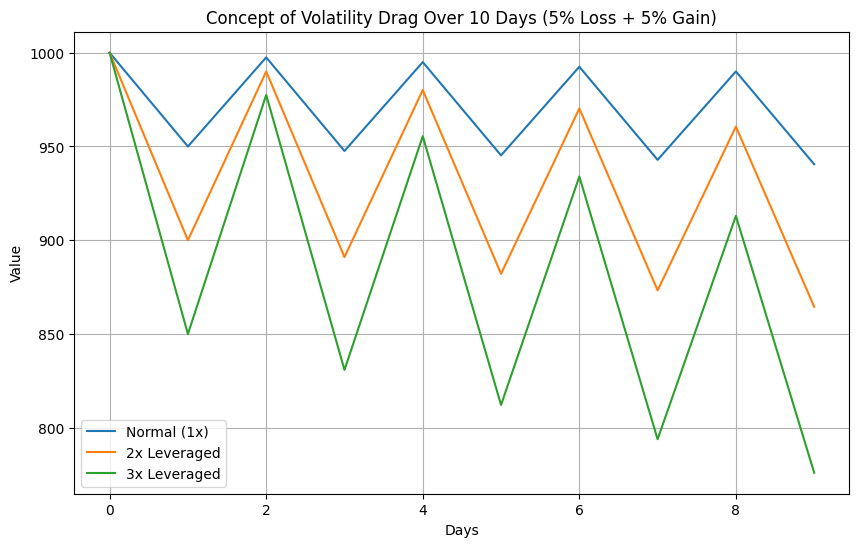

In [ ]:
days = list(range(10))  # Use 10 days
normal_etf = [1000, 950, 997.50, 947.62, 995.00, 945.25, 992.51, 942.88, 990.02, 940.52]
leveraged_2x = [1000, 900, 990, 891, 980.10, 882.09, 970.30, 873.27, 960.60, 864.54]
leveraged_3x = [1000, 850, 977.50, 830.87, 955.50, 812.17, 934.00, 793.90, 912.99, 776.04]

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(days, normal_etf, label='Normal (1x)')
plt.plot(days, leveraged_2x, label='2x Leveraged')
plt.plot(days, leveraged_3x, label='3x Leveraged')

# Add labels and a legend
plt.xlabel('Days')
plt.ylabel('Value')
plt.title('Concept of Volatility Drag Over 10 Days (5% Loss + 5% Gain)')
plt.legend()

# Show the plot
plt.grid()
plt.show()

# Calculating the Volatility Drag for the SP500

In the present investigation, we direct our attention toward the SPX index. It is conceivable to extend our examination to encompass an alternative index. For the purpose of this analysis, we have selected the SPX dataset due to its extensive temporal coverage, comprising a substantial volume of daily data points, particularly pertaining to closing prices, spanning over a significant number of years.


In [ ]:
#You need the Dataset in yout Googledrive
file_path = "/content/drive/My Drive/^SPX.csv"
df = pd.read_csv(file_path)

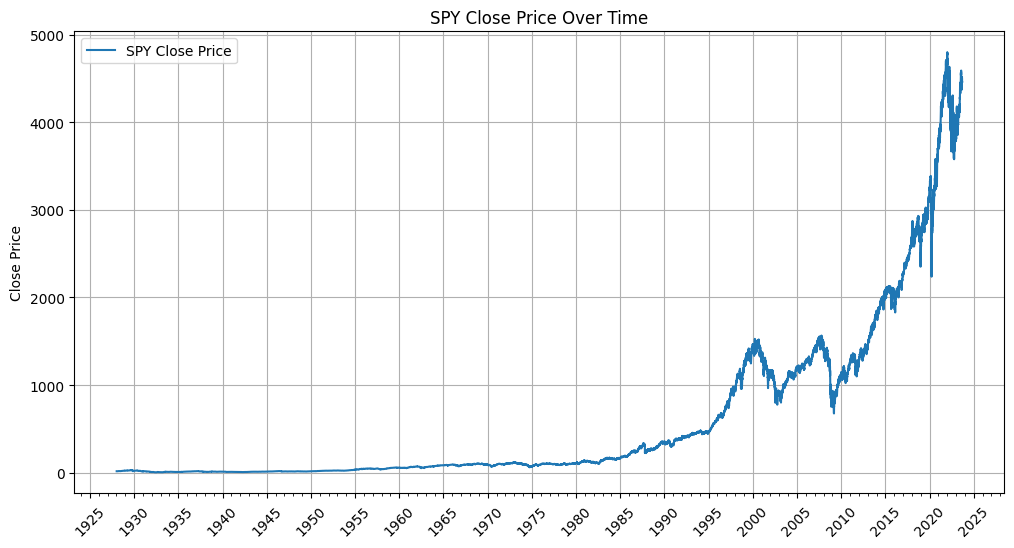

In [ ]:
# Convert the 'Date' column to a datetime format if it's not already in datetime format
df['Date'] = pd.to_datetime(df['Date'])

plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='SPX Close Price')

# Use date formatting for the x-axis ticks (only showing the year)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator(base=5))

# Set minor ticks to display years as well (every year)
plt.gca().xaxis.set_minor_locator(mdates.YearLocator())

plt.ylabel('Close Price')
plt.title('SPX Close Price Over Time')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

Initially, the examination involves a comprehensive review of the dataset, aimed at identifying any glaring errors or anomalies.

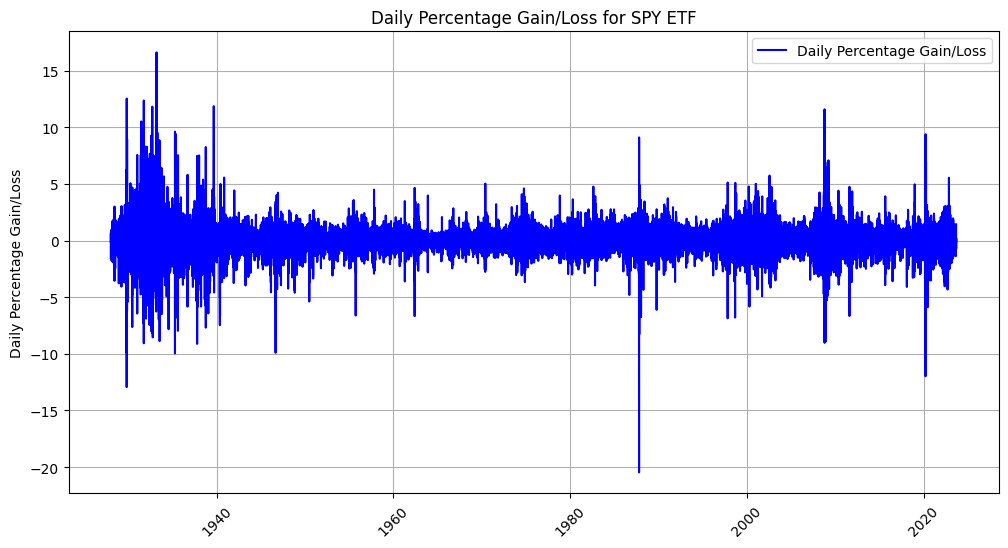

In [ ]:
# Convert the 'Date' column to a datetime format if it's not already in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Calculate the daily percentage gain or loss
df['Daily_Pct_Change'] = df['Close'].pct_change() * 100

# Calculate the average daily percentage gain/loss
average_daily_pct_change = df['Daily_Pct_Change'].mean()

# Create a plot for daily percentage gain or loss
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Daily_Pct_Change'], label='Daily Percentage Gain/Loss', color='b')

plt.ylabel('Daily Percentage Gain/Loss')
plt.title('Daily Percentage Gain/Loss for SPX ETF')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

The subsequent graph illustrates the daily percentage gains or losses for specific timeframe.

In [ ]:
# Calculate the daily percentage change
df['Daily_Pct_Change'] = df['Close'].pct_change() * 100

# Count the number of positive, negative, and zero-change days
positive_days = len(df[df['Daily_Pct_Change'] > 0])
negative_days = len(df[df['Daily_Pct_Change'] < 0])
zero_change_days = len(df[df['Daily_Pct_Change'] == 0])
all_days = positive_days + negative_days + zero_change_days

# Calculate the percentage of positive and negative days
percentage_positive_days = (positive_days / all_days) * 100
percentage_negative_days = (negative_days / all_days) * 100

# Print the results to the console
print(f'Number of Positive Days: {positive_days}')
print(f'Number of Losing Days: {negative_days}')
print(f'Number of Zero-Change Days: {zero_change_days}')
print(f'Number of Overall Days: {all_days}')
print(f'Percentage of Positive Days: {percentage_positive_days:.2f}%')
print(f'Percentage of Losing Days: {percentage_negative_days:.2f}%')

Number of Positive Days: 12574
Number of Losing Days: 11143
Number of Zero-Change Days: 313
Number of Overall Days: 24030
Percentage of Positive Days: 52.33%
Percentage of Losing Days: 46.37%


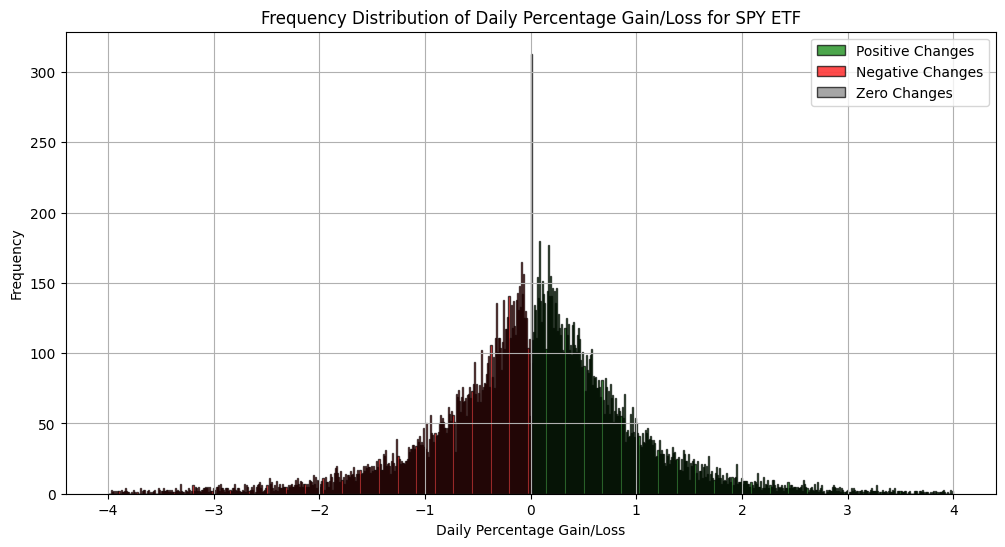

In [ ]:
# Convert the 'Date' column to a datetime format if it's not already in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Calculate the daily percentage gain or loss
df['Daily_Pct_Change'] = df['Close'].pct_change() * 100

# Create a plot for the frequency distribution of daily percentage gain or loss
plt.figure(figsize=(12, 6))

# Define bin edges
bin_edges = [-4 + i * 0.01 for i in range(801)]  # 0.01 percentage point intervals from -2% to 2%

# Filter data for positive, negative, and zero changes
positive_changes = df[df['Daily_Pct_Change'] > 0]['Daily_Pct_Change']
negative_changes = df[df['Daily_Pct_Change'] < 0]['Daily_Pct_Change']
zero_changes = df[df['Daily_Pct_Change'] == 0]['Daily_Pct_Change']

# Create histograms for each category with respective colors
plt.hist(positive_changes, bins=bin_edges, edgecolor='k', color='green', alpha=0.7, label='Positive Changes')
plt.hist(negative_changes, bins=bin_edges, edgecolor='k', color='red', alpha=0.7, label='Negative Changes')
plt.hist(zero_changes, bins=bin_edges, edgecolor='k', color='gray', alpha=0.7, label='Zero Changes')

plt.xlabel('Daily Percentage Gain/Loss')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Daily Percentage Gain/Loss for SPY ETF')
plt.legend()
plt.grid(True)
plt.show()

Having plotted the distribution of each day, it becomes evident that the order exhibits a pattern akin to a binomial distribution.

In [ ]:
# Calculate the daily percentage gain or loss
df['Daily_Pct_Change'] = df['Close'].pct_change() * 100

# Filter data for positive and negative changes
positive_changes = df[df['Daily_Pct_Change'] > 0]['Daily_Pct_Change']
negative_changes = df[df['Daily_Pct_Change'] < 0]['Daily_Pct_Change']

# Calculate the average positive daily percentage
average_positive_pct = positive_changes.mean()

# Calculate the average negative daily percentage
average_negative_pct = negative_changes.mean()

print(f'Average Positive Daily Percentage: {average_positive_pct:.2f}%')
print(f'Average Negative Daily Percentage: {average_negative_pct:.2f}%')

Average Positive Daily Percentage: 0.76%
Average Negative Daily Percentage: -0.79%


The average negative daily percentage demonstrates greater magnitude than the positive counterpart. However, the frequency of positive occurrences surpasses that of negatives. Consequently, we can ascertain the following by computing an impact factor to achieve equal weighting.

In [ ]:
impact_factor = negative_days / positive_days
print(f'The impact_factor: {impact_factor}')

The impact_factor: 0.8861937331000477


In [ ]:
True_negative_daily_impact = average_negative_pct * impact_factor
True_positive_daily_impact = average_positive_pct

print(True_negative_daily_impact)
print(True_positive_daily_impact)

-0.7022110096379331
0.7600753471857


In this context, we have adjusted the probability to match that of positive days while concurrently reducing the mean impact associated with negative occurrences. This alteration allows us to simulate the scenario described in the subsequent script, wherein a positive day follows a negative one.

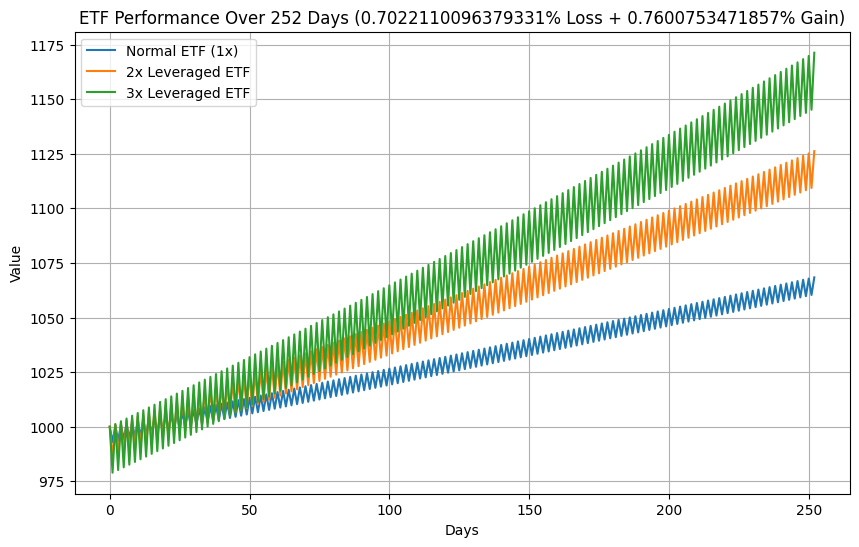

In [ ]:
def calculate_etf_performance(initial_value, loss_percentage, gain_percentage, num_days, leverage=1):
    etf_values = [initial_value]

    for day in range(1, num_days + 1):
        # Determine whether it's a loss or gain day based on the day number
        is_loss_day = (day % 2 == 1)

        # Calculate the daily change based on whether it's a loss day or gain day and the previous day's closing value
        previous_closing_value = etf_values[-1]
        if is_loss_day:
            daily_change = -previous_closing_value * (loss_percentage / 100)
        else:
            daily_change = previous_closing_value * (gain_percentage / 100)

        # Apply leverage
        daily_change *= leverage

        # Update the ETF value for the day
        etf_value = previous_closing_value + daily_change

        # Append the new value to the list
        etf_values.append(etf_value)

    return etf_values

# Parameters
initial_value = 1000
loss_percentage = 0.7022110096379331
gain_percentage = 0.7600753471857
num_days = 252

# Calculate ETF performances with leverage
normal_etf = calculate_etf_performance(initial_value, loss_percentage, gain_percentage, num_days, leverage=1)
leveraged_2x = calculate_etf_performance(initial_value, loss_percentage, gain_percentage, num_days, leverage=2)
leveraged_3x = calculate_etf_performance(initial_value, loss_percentage, gain_percentage, num_days, leverage=3)

# Days
days = list(range(num_days + 1))

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(days, normal_etf, label='Normal ETF (1x)')
plt.plot(days, leveraged_2x, label='2x Leveraged ETF')
plt.plot(days, leveraged_3x, label='3x Leveraged ETF')

# Add labels and a legend
plt.xlabel('Days')
plt.ylabel('Value')
plt.title(f'ETF Performance Over {num_days} Days ({loss_percentage}% Loss + {gain_percentage}% Gain)')
plt.legend()

# Show the plot
plt.grid()
plt.show()

# Risk 4: Broken leg

The final aspect under consideration pertains to the risk associated with exceptionally elevated daily volatility, characterized by magnitudes of 33.34% or 50%. In such scenarios, the computed losses incurred by the 3x and 2x leveraged ETFs reach a staggering 100%, resulting in a complete and total loss of capital.

# Conclusion:
In the absence of the specific ETF cost data, the displayed results indicate that a leveraged S&P 500 index has the potential to outperform a standard ETF over an extended period. Interestingly, the impact of volatility drag appears to be relatively modest in this context, suggesting that the benefits of leveraging may outweigh the negative effects of compounding returns during periods of market volatility.